<a href="https://colab.research.google.com/github/subbu521/EVA4/blob/master/S9/S9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime

x = datetime.datetime.now()

print(x)


2020-03-17 10:37:25.233879


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [16]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 frog  ship  deer horse


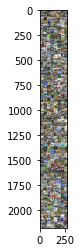

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import QUIZDNN

net = QUIZDNN.Net()


In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import copy

In [0]:
import evascheduler

In [23]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 12
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.2893832921981812 Batch_id=97 Accuracy=40.94: 100%|██████████| 98/98 [00:27<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5172, Accuracy: 4828/10000 (48.28%)

EPOCH: 1


Loss=1.1104929447174072 Batch_id=97 Accuracy=58.71: 100%|██████████| 98/98 [00:27<00:00,  4.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3836, Accuracy: 6164/10000 (61.64%)

EPOCH: 2


Loss=0.9735156297683716 Batch_id=97 Accuracy=65.82: 100%|██████████| 98/98 [00:27<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3597, Accuracy: 6403/10000 (64.03%)

EPOCH: 3


Loss=0.8189913630485535 Batch_id=97 Accuracy=69.70: 100%|██████████| 98/98 [00:27<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3182, Accuracy: 6818/10000 (68.18%)

EPOCH: 4


Loss=0.7625767588615417 Batch_id=97 Accuracy=73.25: 100%|██████████| 98/98 [00:27<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3001, Accuracy: 6999/10000 (69.99%)

EPOCH: 5


Loss=0.6974397301673889 Batch_id=97 Accuracy=76.05: 100%|██████████| 98/98 [00:27<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2745, Accuracy: 7255/10000 (72.55%)

EPOCH: 6


Loss=0.580159604549408 Batch_id=97 Accuracy=79.98: 100%|██████████| 98/98 [00:27<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2453, Accuracy: 7547/10000 (75.47%)

EPOCH: 7


Loss=0.5600854754447937 Batch_id=97 Accuracy=80.89: 100%|██████████| 98/98 [00:28<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2397, Accuracy: 7603/10000 (76.03%)

EPOCH: 8


Loss=0.6053065061569214 Batch_id=97 Accuracy=81.41: 100%|██████████| 98/98 [00:28<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2397, Accuracy: 7603/10000 (76.03%)

EPOCH: 9


Loss=0.4998552203178406 Batch_id=97 Accuracy=81.62: 100%|██████████| 98/98 [00:28<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2372, Accuracy: 7628/10000 (76.28%)

EPOCH: 10


Loss=0.5346369743347168 Batch_id=97 Accuracy=81.92: 100%|██████████| 98/98 [00:28<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2320, Accuracy: 7680/10000 (76.80%)

EPOCH: 11


Loss=0.5711602568626404 Batch_id=97 Accuracy=82.17: 100%|██████████| 98/98 [00:28<00:00,  3.94it/s]



Test set: Average loss: 0.2332, Accuracy: 7668/10000 (76.68%)

